In [1]:
from config import *

In [26]:
import shapely

# Read geo-coord

## read root geo-position

In [2]:
# created by 01_prepare_data
pickle_file = "__pycache__/points_np2d.pkl"

with open(pickle_file, 'rb') as handle:
    points_np2d_pkled = pickle.load(handle)

In [3]:
points_np2d_pkled

array([[ 368059.70337271, 3956057.88353261],
       [ 368059.93162897, 3956056.75447929],
       [ 368060.07021313, 3956056.04525446],
       ...,
       [ 368101.64654537, 3956066.66905537],
       [ 368102.57079688, 3956049.19636116],
       [ 368123.85824642, 3956022.79668753]])

In [9]:
temp_dom = idp.GeoTiff(process_date['220321']['dom'])

In [10]:
pts_file = "__pycache__/points_dict.pkl"
if os.path.exists(pts_file):
    with open(pts_file, 'rb') as handle:
        points = pickle.load(handle)
else:
    points = idp.shp.read_shp(root_shp, shp_proj=temp_dom.crs, name_field=0)
    with open(pts_file, 'wb') as handle:
        pickle.dump(points, handle, protocol=pickle.HIGHEST_PROTOCOL)

[shp][proj] Use projection [WGS 84 / UTM zone 54N] for loaded shapefile [ordered_center_points.shp]


Read shapefile [ordered_center_points.shp]: 100%|██████████| 11098/11098 [05:53<00:00, 31.39it/s]


In [11]:
points

{'1': array([[ 368059.70337271, 3956057.88353261]]),
 '4': array([[ 368059.93162897, 3956056.75447929]]),
 '6': array([[ 368060.07021313, 3956056.04525446]]),
 '959': array([[ 368065.1692951, 3956055.3930937]]),
 '139': array([[ 368060.40852153, 3956057.69603639]]),
 '950': array([[ 368064.50898232, 3956058.52346536]]),
 '275': array([[ 368061.2359505 , 3956057.19876381]]),
 '142': array([[ 368060.62454978, 3956056.501767  ]]),
 '411': array([[ 368061.87180724, 3956057.60636429]]),
 '546': array([[ 368062.54842403, 3956057.83054455]]),
 '684': array([[ 368063.52258917, 3956056.28981475]]),
 '145': array([[ 368060.88133808, 3956055.41347372]]),
 '957': array([[ 368064.98995089, 3956056.10639453]]),
 '140': array([[ 368060.44520557, 3956057.16615577]]),
 '953': array([[ 368064.6597945, 3956057.5329962]]),
 '410': array([[ 368061.76175511, 3956057.91206465]]),
 '547': array([[ 368062.60141209, 3956057.50854017]]),
 '816': array([[ 368063.99132972, 3956057.5329962 ]]),
 '680': array([[ 368

In [22]:
broccoli_idx = np.asarray(list(points.keys()), dtype=np.uint16)
broccoli_idx

array([    1,     4,     6, ...,  8001,  7488, 10385], dtype=uint16)

In [24]:
# examine the broccoli id share the same points with numpy array
for i, idx in enumerate(broccoli_idx):
    a = points_np2d_pkled[i,:]
    b = points[str(idx)][0]
    np.testing.assert_almost_equal(a, b)

## read grid geo-position

In [4]:
grid_shp = f"{project_data_folder}/02_GIS/split_grid.shp"
roi = idp.ROI(grid_shp, name_field=0)

[shp][proj] Use projection [WGS 84 / UTM zone 54N] for loaded shapefile [split_grid.shp]


Read shapefile [split_grid.shp]: 100%|██████████| 504/504 [00:01<00:00, 424.51it/s]


In [5]:
roi

<easyidp.ROI> with 504 items
[0]	1
array([[ 368058.59787001, 3956058.88557004],
       [ 368061.04143287, 3956059.41377509],
       [ 368061.56963791, 3956056.97021223],
       [ 368059.12607505, 3956056.44200719],
       [ 368058.59787001, 3956058.88557004]])
[1]	2
array([[ 368059.12607505, 3956056.44200719],
       [ 368061.56963791, 3956056.97021223],
       [ 368062.09784295, 3956054.52664938],
       [ 368059.6542801 , 3956053.99844433],
       [ 368059.12607505, 3956056.44200719]])
...
[502]	595
array([[ 368124.83571154, 3956024.6065918 ],
       [ 368127.27927439, 3956025.13479684],
       [ 368127.80747944, 3956022.69123398],
       [ 368125.36391658, 3956022.16302894],
       [ 368124.83571154, 3956024.6065918 ]])
[503]	596
array([[ 368125.36391658, 3956022.16302894],
       [ 368127.80747944, 3956022.69123398],
       [ 368128.33568448, 3956020.24767113],
       [ 368125.89212163, 3956019.71946608],
       [ 368125.36391658, 3956022.16302894]])

## Read Metashape + DOM/DSM

In [74]:
ms_dict = {}
for key, val in process_date.items():
    ms = idp.Metashape(val['project'], val['chunk_id'])
    ms.dom = idp.GeoTiff(val['dom'])
    ms.dsm = idp.GeoTiff(val['dsm'])
    ms.crs = ms.dom.crs

    ms_dict[key] = ms

Filter out broccoli points in grids

In [77]:
roi_id = '1'

In [78]:
grid_np = roi[roi_id]
xmin, ymin = grid_np.min(axis=0)
xmax, ymax = grid_np.max(axis=0)

rough_idx = (points_np2d_pkled[:,0] >= xmin) & (points_np2d_pkled[:,0] <= xmax) &\
            (points_np2d_pkled[:,1] >= ymin) & (points_np2d_pkled[:,1] <= ymax)

broccoli_in = broccoli_idx[rough_idx]
broccoli_in_pos = points_np2d_pkled[rough_idx]

In [79]:
broccoli_in

array([  1,   4, 139, 275, 142, 140,   3, 141, 274, 277, 276,   2],
      dtype=uint16)

In [80]:
broccoli_in_pos

array([[ 368059.70337271, 3956057.88353261],
       [ 368059.93162897, 3956056.75447929],
       [ 368060.40852153, 3956057.69603639],
       [ 368061.2359505 , 3956057.19876381],
       [ 368060.62454978, 3956056.501767  ],
       [ 368060.44520557, 3956057.16615577],
       [ 368059.82972885, 3956057.08055967],
       [ 368060.55933371, 3956056.83192338],
       [ 368061.1503544 , 3956057.51669218],
       [ 368061.4112187 , 3956056.52622303],
       [ 368061.3215466 , 3956056.82784738],
       [ 368059.74413275, 3956057.52076819]])

In [124]:
gridx = np.linspace(xmin-0.5, xmax+0.5, 70)
gridy = np.linspace(ymin-0.5, ymax+0.5, 70)

xx, yy = np.meshgrid(gridx, gridy)
xxyy = np.dstack([xx.flat, yy.flat])[0]

xxyy

array([[ 368058.09787001, 3956055.94200719],
       [ 368058.15543186, 3956055.94200719],
       [ 368058.21299372, 3956055.94200719],
       ...,
       [ 368061.9545142 , 3956059.91377509],
       [ 368062.01207606, 3956059.91377509],
       [ 368062.06963791, 3956059.91377509]])

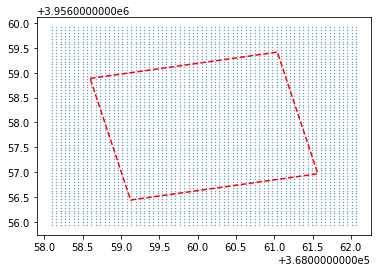

In [125]:
plt.plot(*grid_np.T, 'r--')
plt.scatter(*xxyy.T, s=0.1)

In [126]:
roi_one = idp.ROI()
roi_one.crs = roi.crs
roi_one[roi_id] = xxyy

roi_grid = idp.ROI()
roi_grid.crs = roi.crs
roi_grid[roi_id] = roi[roi_id]

In [128]:
roi_one.get_z_from_dsm(ms_dict['220405'].dsm, mode='point')
roi_one

Read z values of roi from DSM [broccoli_tanashi_5_20220405_0_dsm.tif]: 100%|██████████| 1/1 [00:05<00:00,  5.67s/it]


<easyidp.ROI> with 1 items
[0]	1
array([[ 368058.09787001, 3956055.94200719,      96.81803131],
       [ 368058.15543186, 3956055.94200719,      96.80795288],
       [ 368058.21299372, 3956055.94200719,      96.75403595],
       ...,
       [ 368061.9545142 , 3956059.91377509,      96.66855621],
       [ 368062.01207606, 3956059.91377509,      96.66439056],
       [ 368062.06963791, 3956059.91377509,      96.64727783]])

In [120]:
roi_grid.get_z_from_dsm(ms_dict['220405'].dsm, mode='face')
roi_grid

Read z values of roi from DSM [broccoli_tanashi_5_20220405_0_dsm.tif]: 100%|██████████| 1/1 [00:00<00:00, 22.20it/s]


<easyidp.ROI> with 1 items
[0]	1
array([[ 368058.59787001, 3956058.88557004,      96.70951843],
       [ 368061.04143287, 3956059.41377509,      96.70951843],
       [ 368061.56963791, 3956056.97021223,      96.70951843],
       [ 368059.12607505, 3956056.44200719,      96.70951843],
       [ 368058.59787001, 3956058.88557004,      96.70951843]])

In [129]:
ms = ms_dict['220405']
roi_one_on_img = ms._back2raw_one2one(ms._world2local(ms._crs2world(roi_one[0])), 'DJI_0356')
roi_one_on_img

array([[3188.13301887, 2753.42856839],
       [3191.68074769, 2738.2110415 ],
       [3193.67342723, 2720.00943172],
       ...,
       [2439.28694347, 1509.05643261],
       [2443.20075533, 1494.52913856],
       [2447.34805363, 1480.27311286]])

In [121]:
roi_grid_on_img = ms._back2raw_one2one(ms._world2local(ms._crs2world(roi_grid[0])), 'DJI_0356')
roi_grid_on_img

array([[2475.64947418, 2427.11268879],
       [2504.61791404, 1774.04469831],
       [3159.17161139, 1803.80098376],
       [3127.84976836, 2455.30664441],
       [2475.64947418, 2427.11268879]])

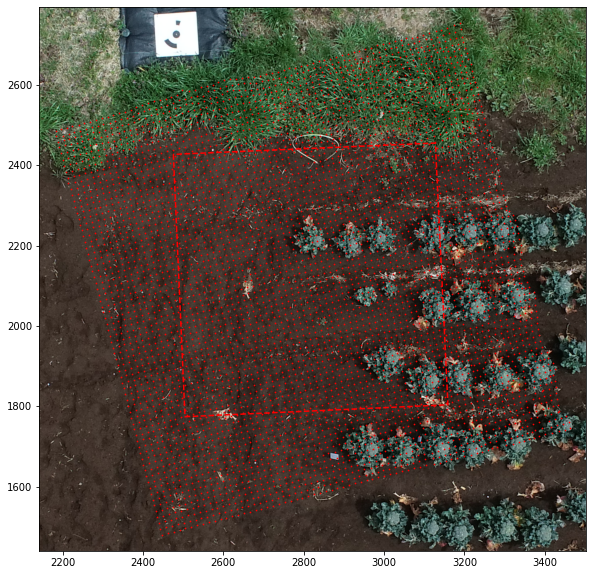

In [134]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

img_np = plt.imread(ms.photos['DJI_0356'].path)
ax.imshow(img_np)

ax.scatter(roi_one_on_img[:,0], roi_one_on_img[:,1], s=0.5, c='r')
ax.plot(*roi_grid_on_img.T, 'r--')

bf = 40
xn,yn = roi_one_on_img.min(axis=0)
xm,ym = roi_one_on_img.max(axis=0)

ax.set_xlim([xn-40, xm+40])
ax.set_ylim([yn-40, ym+40])

plt.show()

Piecewise Affine Transformation

In [173]:
from skimage.transform import ProjectiveTransform, PiecewiseAffineTransform

In [143]:
grid_on_dom = ms.dom.geo2pixel(xxyy)
grid_on_dom

array([[ 999.71224737, 5437.98049204],
       [1014.34750382, 5437.98049204],
       [1028.98276029, 5437.98049204],
       ...,
       [1980.27443016, 4428.14779634],
       [1994.90968664, 4428.14779634],
       [2009.54494309, 4428.14779634]])

In [144]:
tform = PiecewiseAffineTransform()
tform.estimate(grid_on_dom, roi_one_on_img)

True

In [174]:
roi_grid_on_dom = ms.dom.geo2pixel(roi[roi_id])

In [175]:
oform = ProjectiveTransform()
oform.estimate(roi_grid_on_dom, roi_grid_on_img)

True

# Read BiSeNet segment results

In [6]:
head_json = idp.jsonfile.read_json(f"{result_folder}/out_results.json")

In [8]:
head_json['20220405_0']['1_DJI_0356'].keys()

dict_keys(['out', 'cropLeftTopCorner', 'gridCoordOnCroppedImage', 'headCoordOnCroppedImage'])

## do the analysis

In [28]:
def mk_rm_line(bound_np, rm_bound_id):
    bound_np = bound_np[:-1, :]
    
    return shapely.geometry.LineString(bound_np[rm_bound_id-1:rm_bound_id+2,:])

In [35]:
date = '20220405_0'
img = '1_DJI_0356'
grid = img.split('_')[0]

roi_np = np.asarray(head_json[date][img]['gridCoordOnCroppedImage'])
grid_poly = shapely.geometry.Polygon(roi_np)
rm_line = mk_rm_line(roi_np, 2)

shapely_detect_in = []
shapely_detect_out = []
for i, head in enumerate(head_json[date][img]['out']):
    head_shply = shapely.geometry.Polygon(head)
    if head_shply.intersects(rm_line):
        shapely_detect_out.append(i)
    else:
        if head_shply.intersects(grid_poly):
            shapely_detect_in.append(i)
        else:
            shapely_detect_out.append(i)

In [37]:
shapely_detect_in, shapely_detect_out

([0, 1, 3, 4, 5], [2, 6])

In [135]:
np.asarray(head_json[date][img]['gridCoordOnCroppedImage'])

array([[158.64947418, 813.11268879],
       [187.61791404, 160.04469831],
       [842.17161139, 189.80098376],
       [810.84976836, 841.30664441],
       [158.64947418, 813.11268879]])

In [151]:
offset = np.asarray(head_json[date][img]['cropLeftTopCorner'])
np.asarray(head_json[date][img]['gridCoordOnCroppedImage']) + offset

array([[2475.64947418, 2427.11268879],
       [2504.61791404, 1774.04469831],
       [3159.17161139, 1803.80098376],
       [3127.84976836, 2455.30664441],
       [2475.64947418, 2427.11268879]])

In [176]:
head_on_dom_list = []
head_on_dom_list_old = []
for in_id in shapely_detect_in:
    head_np = np.asarray(head_json[date][img]['out'][in_id])

    head_on_dom_list.append(tform.inverse(head_np + offset))
    head_on_dom_list_old.append(oform.inverse(head_np + offset))

In [168]:
buffer = 50

dom_xmin, dom_ymin = roi_grid_on_dom.min(axis=0)
dom_xmax, dom_ymax = roi_grid_on_dom.max(axis=0)

dom_grid_crop = ms.dom.crop_rectangle(
    left = int(dom_xmin - buffer),
    top  = int(dom_ymin - buffer),
    w    = int(dom_xmax - dom_xmin + buffer * 2),
    h    = int(dom_ymax - dom_ymin + buffer * 2),
    is_geo=False   # this is pixel coordinate on dom
)

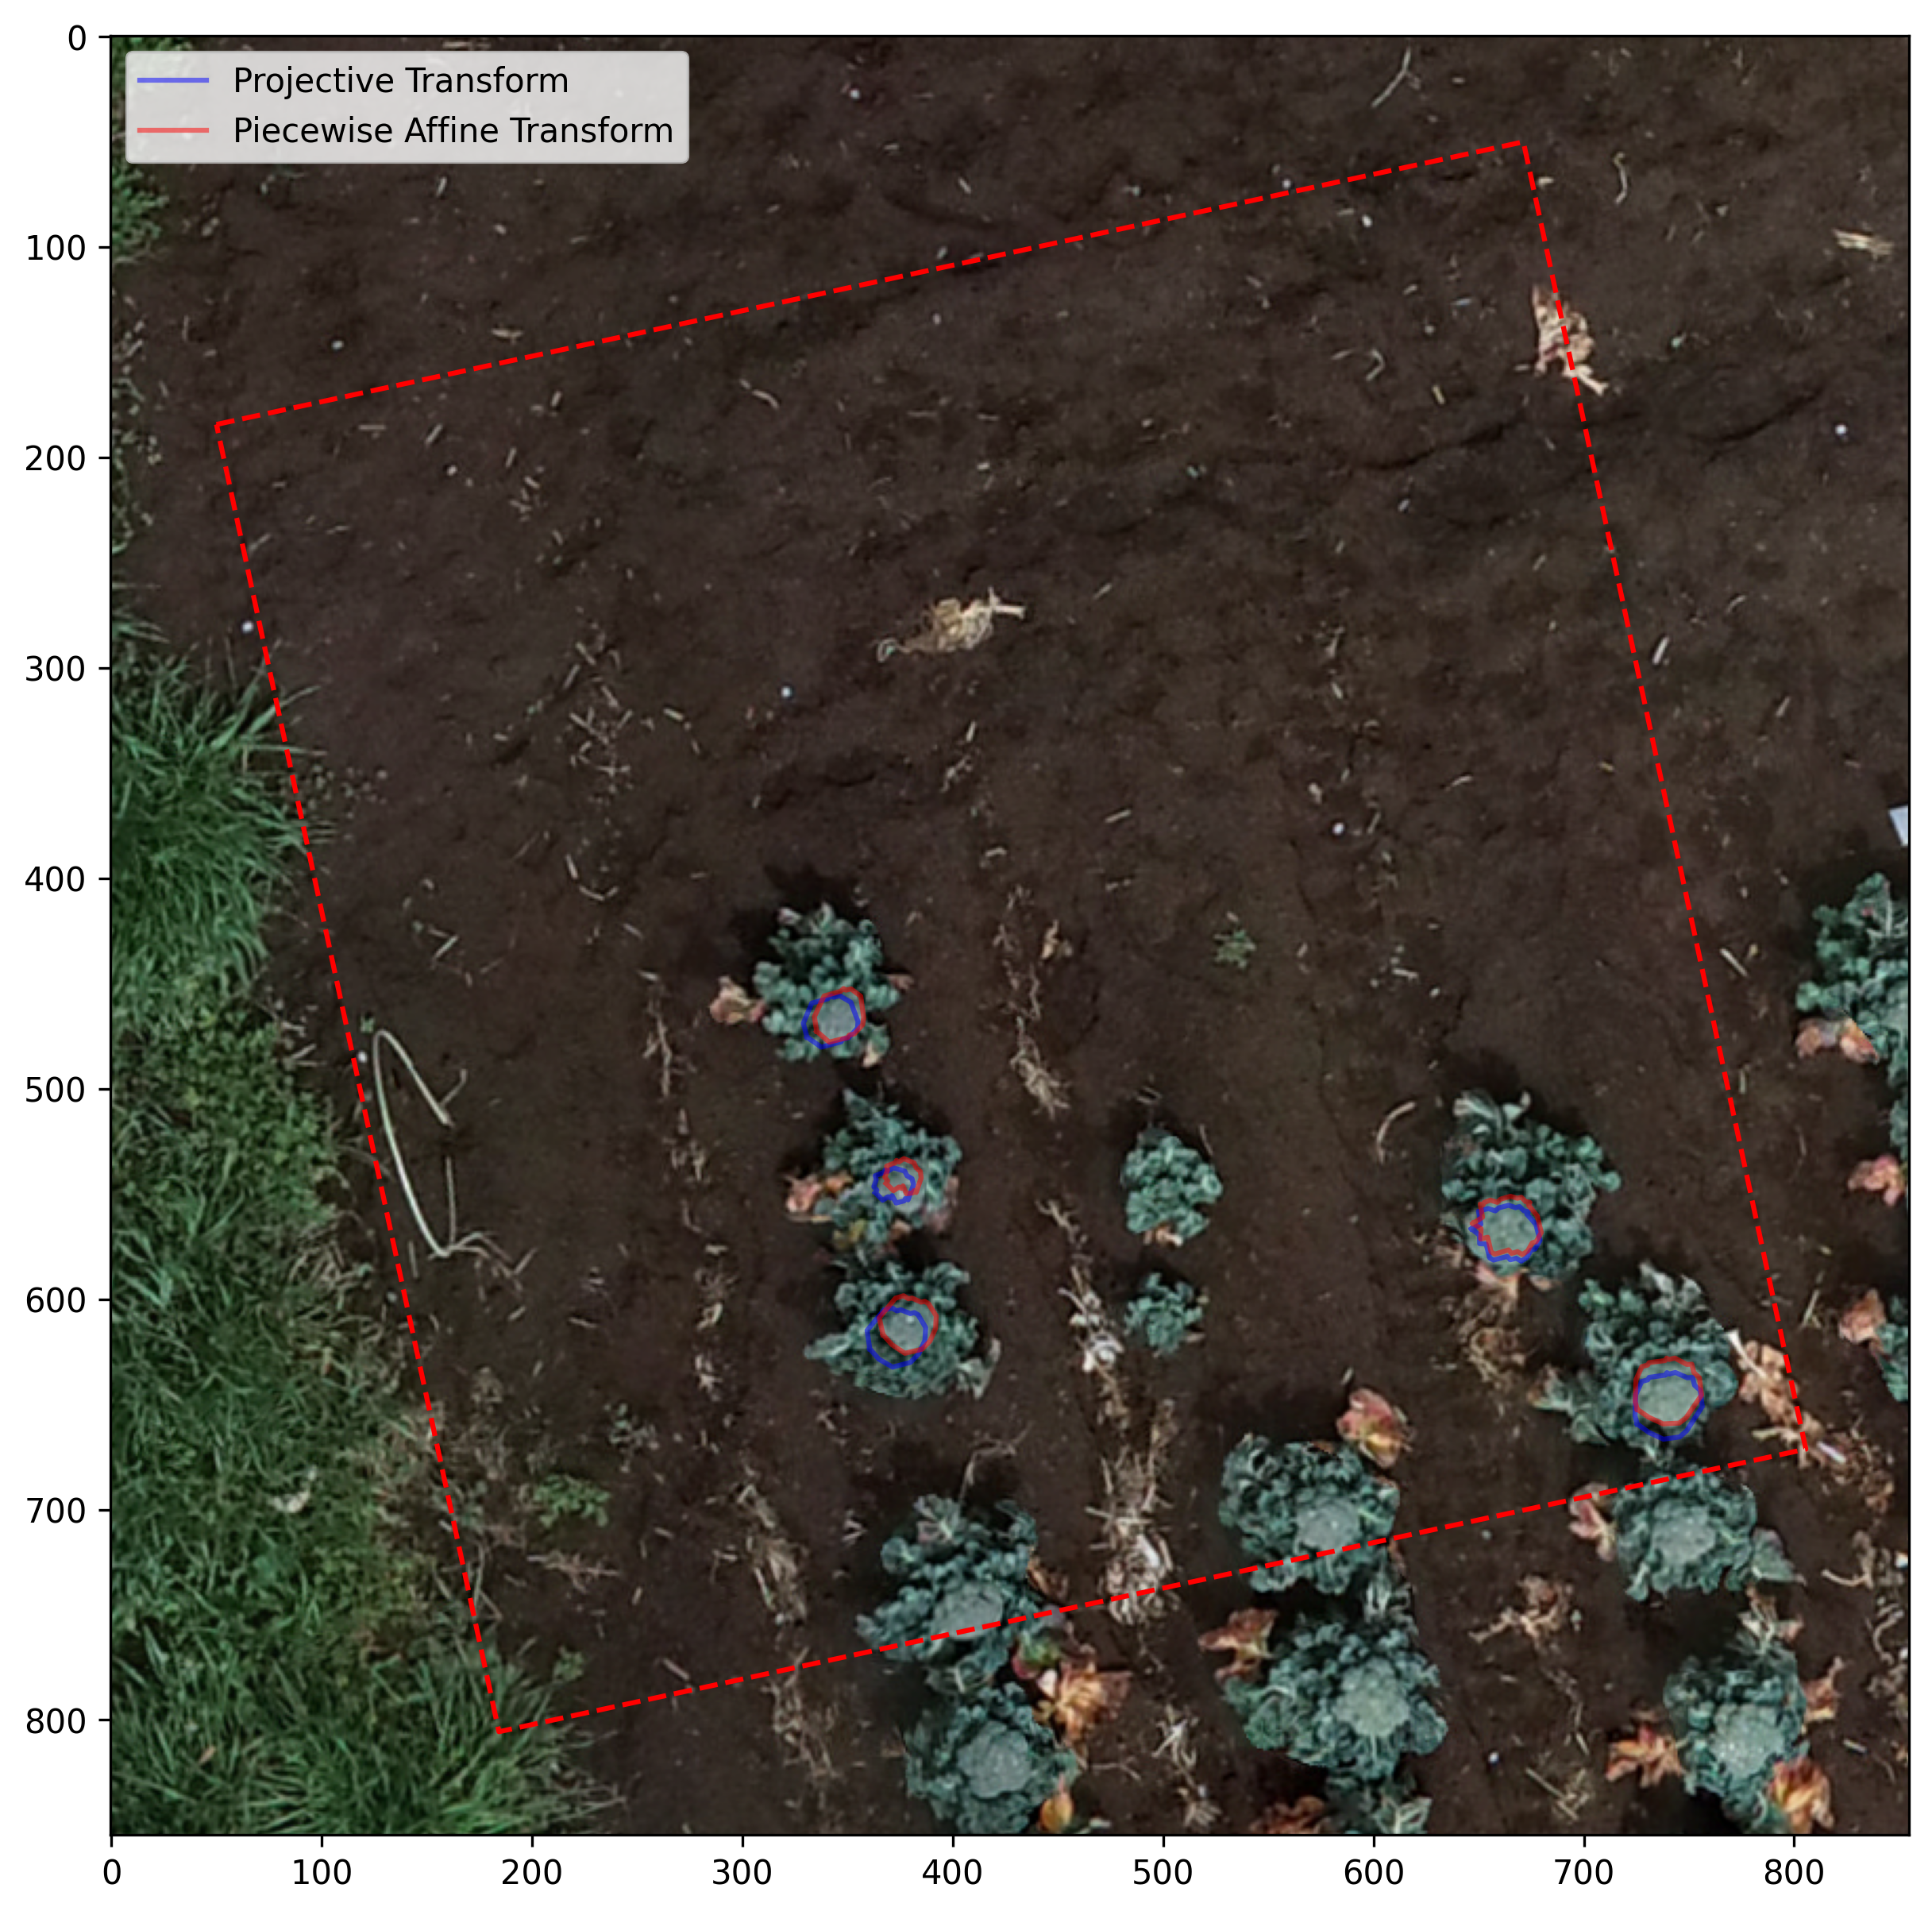

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=300)

ax.imshow(dom_grid_crop[:,:,0:3])
offset_coord = roi_grid_on_dom - np.array([dom_xmin-buffer, dom_ymin-buffer])
ax.plot(*offset_coord.T, '--r')


for i, v in enumerate(head_on_dom_list_old):
    bb = v - np.array([dom_xmin-buffer, dom_ymin-buffer])
    if i == 0:
        ax.plot(*bb.T, '-b', alpha=0.5, label='Projective Transform')
    else:
        ax.plot(*bb.T, '-b', alpha=0.5)

for i, v in enumerate(head_on_dom_list):
    bb = v - np.array([dom_xmin-buffer, dom_ymin-buffer])

    if i == 0:
        ax.plot(*bb.T, '-r', alpha=0.5, label='Piecewise Affine Transform')
    else:
        ax.plot(*bb.T, '-r', alpha=0.5)

ax.legend()

plt.show()

array([[2475.64947418, 2427.11268879],
       [2504.61791404, 1774.04469831],
       [3159.17161139, 1803.80098376],
       [3127.84976836, 2455.30664441],
       [2475.64947418, 2427.11268879]])